In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas 

idx = pandas.IndexSlice

orders = array([2,3])        # polynomial order
Nv = array([8,16,24,32])

# Integration  : 
# time steps   : Number of time steps to time tfinal
# dt           : Time step size
# CFL          : CFL number
# Errors       : (1-norm, 2-norm and inf-norm) errors

ex_list = ['Diffusion']

cols = ['time steps', 'cfl','2-norm']
elements = Nv
iterables = [ex_list, ['Dirichlet','Neumann','Robin'],['exact','inexact'], orders, elements]

index = pandas.MultiIndex.from_product(iterables,names=['Eq.','BCs','integration','order','elements'])
df = pandas.DataFrame(index=index,columns=cols).sort_index()

df.loc[idx['Diffusion','Dirichlet',['inexact']]]

time steps  cfl 2-norm
Eq.       BCs       integration order elements                       
Diffusion Dirichlet inexact     2     8               NaN  NaN    NaN
                                      16              NaN  NaN    NaN
                                      24              NaN  NaN    NaN
                                      32              NaN  NaN    NaN
                                3     8               NaN  NaN    NaN
                                      16              NaN  NaN    NaN
                                      24              NaN  NaN    NaN
                                      32              NaN  NaN    NaN

In [3]:
output_file = 'Dirichlet_py/output.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('M',int),('cfl','d'),('2-norm','d')])

# Create a nested data type
dt_info = dtype([('order',int),('integType',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,len(Nv)))])

# Read in four sets of data (orders 1,2 and integType 1,2)
out_data = fromfile(fout,dtype=dt_block, count=len(Nv))
print(out_data)
fout.close()

# Store data in DataFrame
for k in range(2):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    if Itype == 1:        
        typex = 'inexact'
    else:
        typex = 'exact'
    
    for d in out_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['Diffusion','Dirichlet',typex,order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Dirichlet',['inexact'],:],:]
df_out.style.format(fstr)

[((2, 1), [( 8,    36, 6., 3.74417863e-03), (16,   501, 6., 2.72669489e-04), (24,  2434, 6., 5.64111044e-05), (32,  7537, 6., 1.82639205e-05)])
 ((3, 1), [( 8,   165, 6., 8.44171623e-04), (16,  2434, 6., 5.77673464e-05), (24, 11989, 6., 1.17633154e-05), (32, 37375, 6., 3.77898327e-06)])]


In [4]:
output_file = 'Neumann_py/output_r2.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('M',int),('cfl','d'),('2-norm','d')])

# Create a nested data type
dt_info = dtype([('order',int),('integType',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,len(Nv)))])

# Read in four sets of data (orders 1,2 and integType 1,2)
out_data = fromfile(fout,dtype=dt_block, count=len(Nv))
fout.close()

# Store data in DataFrame
for k in range(2):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    if Itype == 1:        
        typex = 'inexact'
    else:
        typex = 'exact'
    
    for d in out_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['Diffusion','Neumann',typex,order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Neumann',['inexact'],:],:]
df_out.style.format(fstr)

In [5]:
output_file = 'Robin_py/output_r2.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('M',int),('cfl','d'),('2-norm','d')])

# Create a nested data type
dt_info = dtype([('order',int),('integType',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,len(Nv)))])

# Read in four sets of data (orders 1,2 and integType 1,2)
out_data = fromfile(fout,dtype=dt_block, count=len(Nv))
fout.close()

# Store data in DataFrame
for k in range(2):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    if Itype == 1:        
        typex = 'inexact'
    else:
        typex = 'exact'
    
    for d in out_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['Diffusion','Robin',typex,order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Robin',['inexact'],:],:]
df_out.style.format(fstr)

In [6]:
def set_xticks(P):
    p0 = log2(P[0])
    p1 = log2(P[-1])
    xlim([2**(p0-1), 2**(p1+1)])
    
    Pstr = (['{:d}'.format(int(p)) for p in P])
    xticks(P,Pstr)

<IPython.core.display.Javascript object>


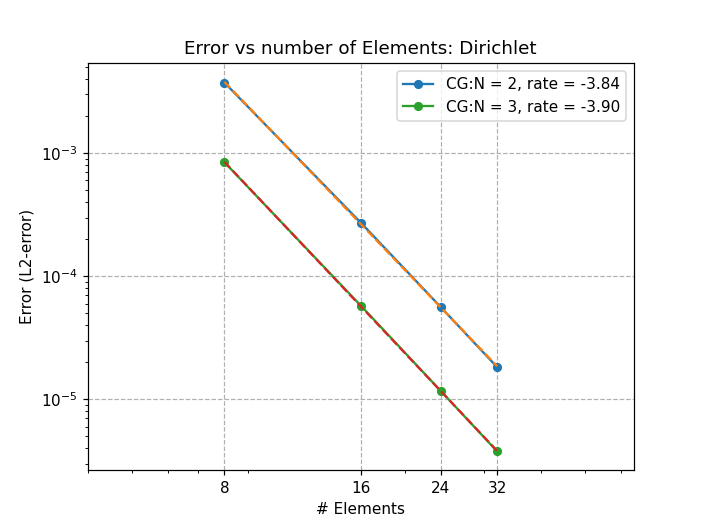

In [7]:
figure(1)

for i,o in enumerate(orders):
    
    e2 = df.loc[idx['Diffusion','Dirichlet','inexact',o,:],'2-norm'].values
    
    # DG exact 
    if(o >= 4):
        p = polyfit(log(Nv[:2]), log(e2.astype(float)[:2]), 1)
    else:
        p = polyfit(log(Nv[:]), log(e2.astype(float)[:]), 1)

    loglog(Nv, e2, '.-',markersize = 10, label = 'CG:N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: Dirichlet')

grid(axis='both',linestyle='--')
legend()
show()   

<IPython.core.display.Javascript object>


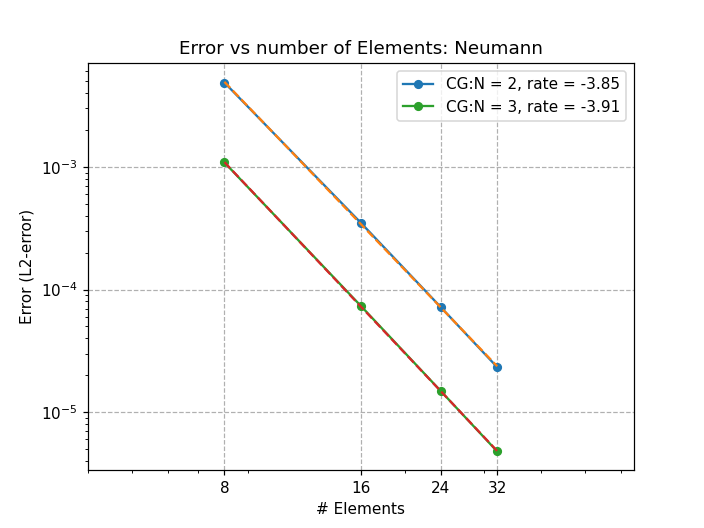

In [8]:
figure(2)

for i,o in enumerate(orders):
    
    e2 = df.loc[idx['Diffusion','Neumann','inexact',o,:],'2-norm'].values
    
    # DG exact 
    if(o >= 4):
        p = polyfit(log(Nv[:2]), log(e2.astype(float)[:2]), 1)
    else:
        p = polyfit(log(Nv[:]), log(e2.astype(float)[:]), 1)

    loglog(Nv, e2, '.-',markersize = 10, label = 'CG:N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: Neumann')

grid(axis='both',linestyle='--')
legend()
show()   

<IPython.core.display.Javascript object>


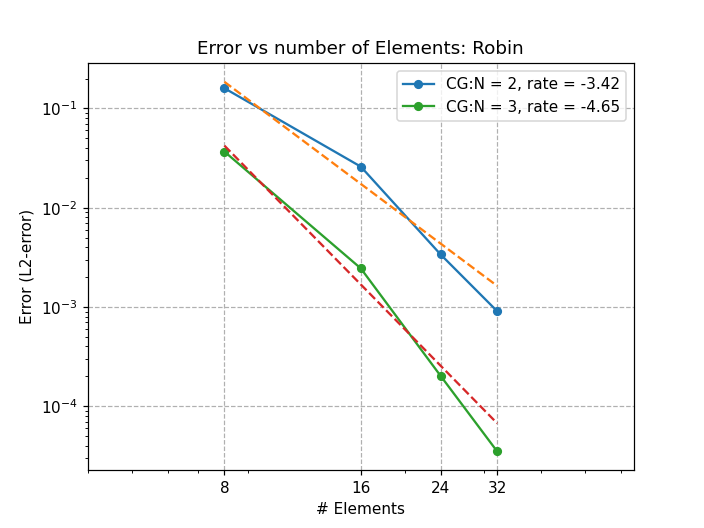

In [9]:
figure(3)

for i,o in enumerate(orders):
    
    e2 = df.loc[idx['Diffusion','Robin','inexact',o,:],'2-norm'].values
    
    # DG exact 
    if(o >= 4):
        p = polyfit(log(Nv[:2]), log(e2.astype(float)[:2]), 1)
    else:
        p = polyfit(log(Nv[:3]), log(e2.astype(float)[:3]), 1)

    loglog(Nv, e2, '.-',markersize = 10, label = 'CG:N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: Robin')

grid(axis='both',linestyle='--')
legend()
show()   

## NUMO output

In [10]:
data_02 = loadtxt('Neumann1/conv__nop2.dat')
data_03 = loadtxt('Neumann1/conv__nop3.dat')
#data_06 = loadtxt('Neumann1/conv__nop4.dat')

data_neumann = array([data_02[:,-1], data_03[:,-1]])#, data_06[:,-1]])
Nv = array([8, 16, 24, 32])

Order = array([2,3])
data_neumann

array([[8.63456844e-04, 2.40928524e-04, 1.10696104e-04, 6.38603489e-05],
       [4.17652945e-04, 1.11771994e-04, 5.10066850e-05, 2.91120006e-05]])

<IPython.core.display.Javascript object>


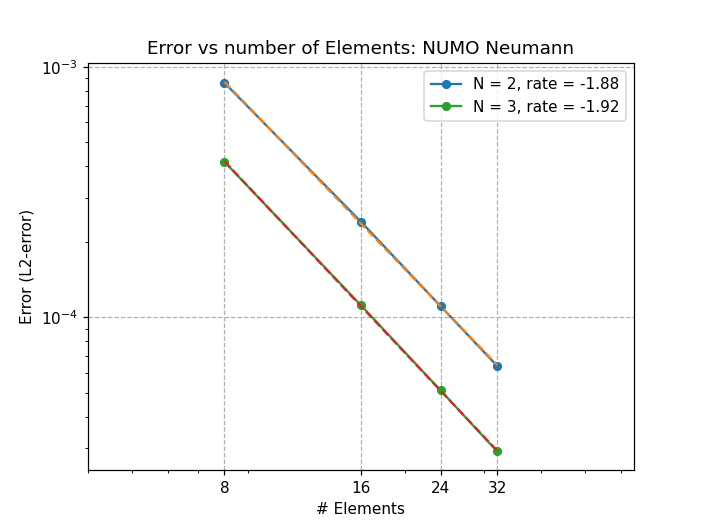

In [11]:
figure(4)

for i,o in enumerate(Order):
    
    e2 = data_neumann[i,:]
    
    # DG exact 
    if(o >= 4):
        p = polyfit(log(Nv[:3]), log(e2[:3]), 1)
    else:
        p = polyfit(log(Nv[:]), log(e2), 1)

    loglog(Nv, e2, '.-',markersize=10, label = 'N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: NUMO Neumann')

grid(axis='both',linestyle='--')
legend()
show()   

In [12]:
data_02 = loadtxt('Dirichlet1/conv__nop2.dat')
data_03 = loadtxt('Dirichlet1/conv__nop3.dat')
#data_04 = loadtxt('Dirichlet/conv__nop4.dat')

data_dirichlet = array([data_02[:,-1], data_03[:,-1]])#, data_06[:,-1]])
Nv = array([8, 16, 24,32])

Order = array([2,3])
data_dirichlet

array([[3.10273289e-03, 1.26753399e-03, 6.75857274e-04, 4.35310606e-04],
       [1.19148873e-06, 4.83495912e-07, 2.72157488e-07, 1.79316944e-07]])

<IPython.core.display.Javascript object>


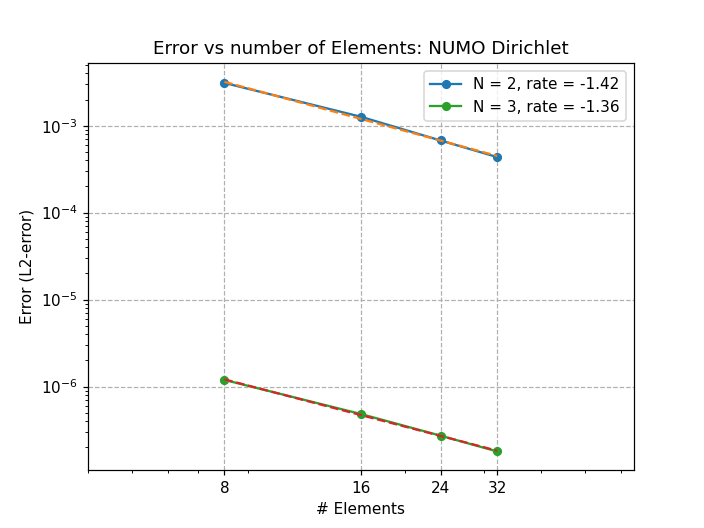

In [13]:
figure(5)

for i,o in enumerate(Order):
    
    e2 = data_dirichlet[i,:]
    
    # DG exact 
    if(o >= 4):
        p = polyfit(log(Nv[:2]), log(e2[:2]), 1)
    else:
        p = polyfit(log(Nv[:]), log(e2), 1)

    loglog(Nv, e2, '.-',markersize=10, label = 'N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: NUMO Dirichlet')

grid(axis='both',linestyle='--')
legend()
show()   

<IPython.core.display.Javascript object>


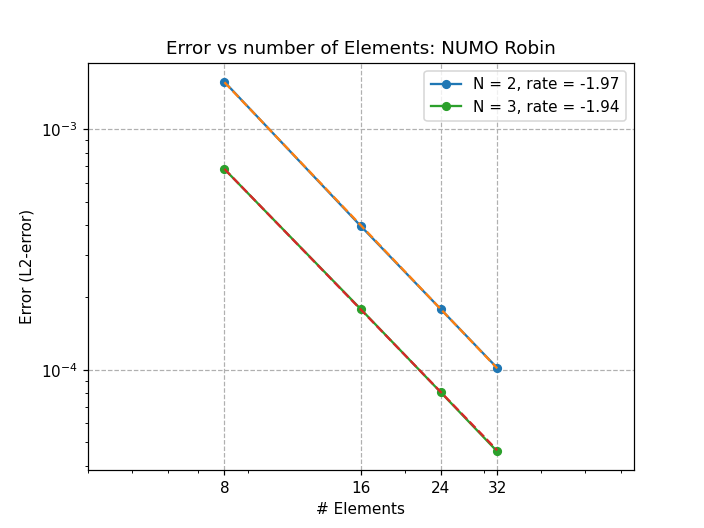

In [14]:
data_02 = loadtxt('Robin1/conv__nop2.dat')
data_03 = loadtxt('Robin1/conv__nop3.dat')
#data_06 = loadtxt('Robin/conv__nop4.dat')

data_robin = array([data_02[:,-1], data_03[:,-1]])#, data_06[:,-1]])
Nv = array([8,16,24,32 ])

Order = array([2,3])


figure(6)

for i,o in enumerate(Order):
    
    e2 = data_robin[i,:]
    
    # DG exact 
    if(o >= 3):
        p = polyfit(log(Nv[:3]), log(e2[:3]), 1)
    else:
        p = polyfit(log(Nv[:]), log(e2), 1)

    loglog(Nv, e2, '.-',markersize=10, label = 'N = {}, rate = {:.2f}'.format(o,p[0]))
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements: NUMO Robin')

grid(axis='both',linestyle='--')
legend()
show()   